In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/patoram123/Proyecto_Visualizacion/main/datasets/public_bikes_2018/seul/SeoulBikeData.csv'
                ,encoding='unicode escape')

In [90]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [91]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [93]:
df_2 = df.groupby(['Date','Seasons','Holiday','Functioning Day'], as_index=False).agg({'Rented Bike Count':'sum',
                                        'Temperature(°C)':'mean',
                                        'Humidity(%)':'mean', 'Wind speed (m/s)':'mean', 
                                        'Visibility (10m)':'mean', 'Dew point temperature(°C)':'mean',
                                        'Solar Radiation (MJ/m2)':'mean', 'Rainfall(mm)':'mean', 
                                        'Snowfall (cm)':'mean'})

In [94]:
df_2.head()

,Date,Seasons,Holiday,Functioning Day,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-12-01,Winter,No Holiday,Yes,9539,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0
1,2017-12-02,Winter,No Holiday,Yes,8523,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0
2,2017-12-03,Winter,No Holiday,Yes,7222,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0
3,2017-12-04,Winter,No Holiday,Yes,8729,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0
4,2017-12-05,Winter,No Holiday,Yes,8307,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0


### Análisis exploratorio de datos

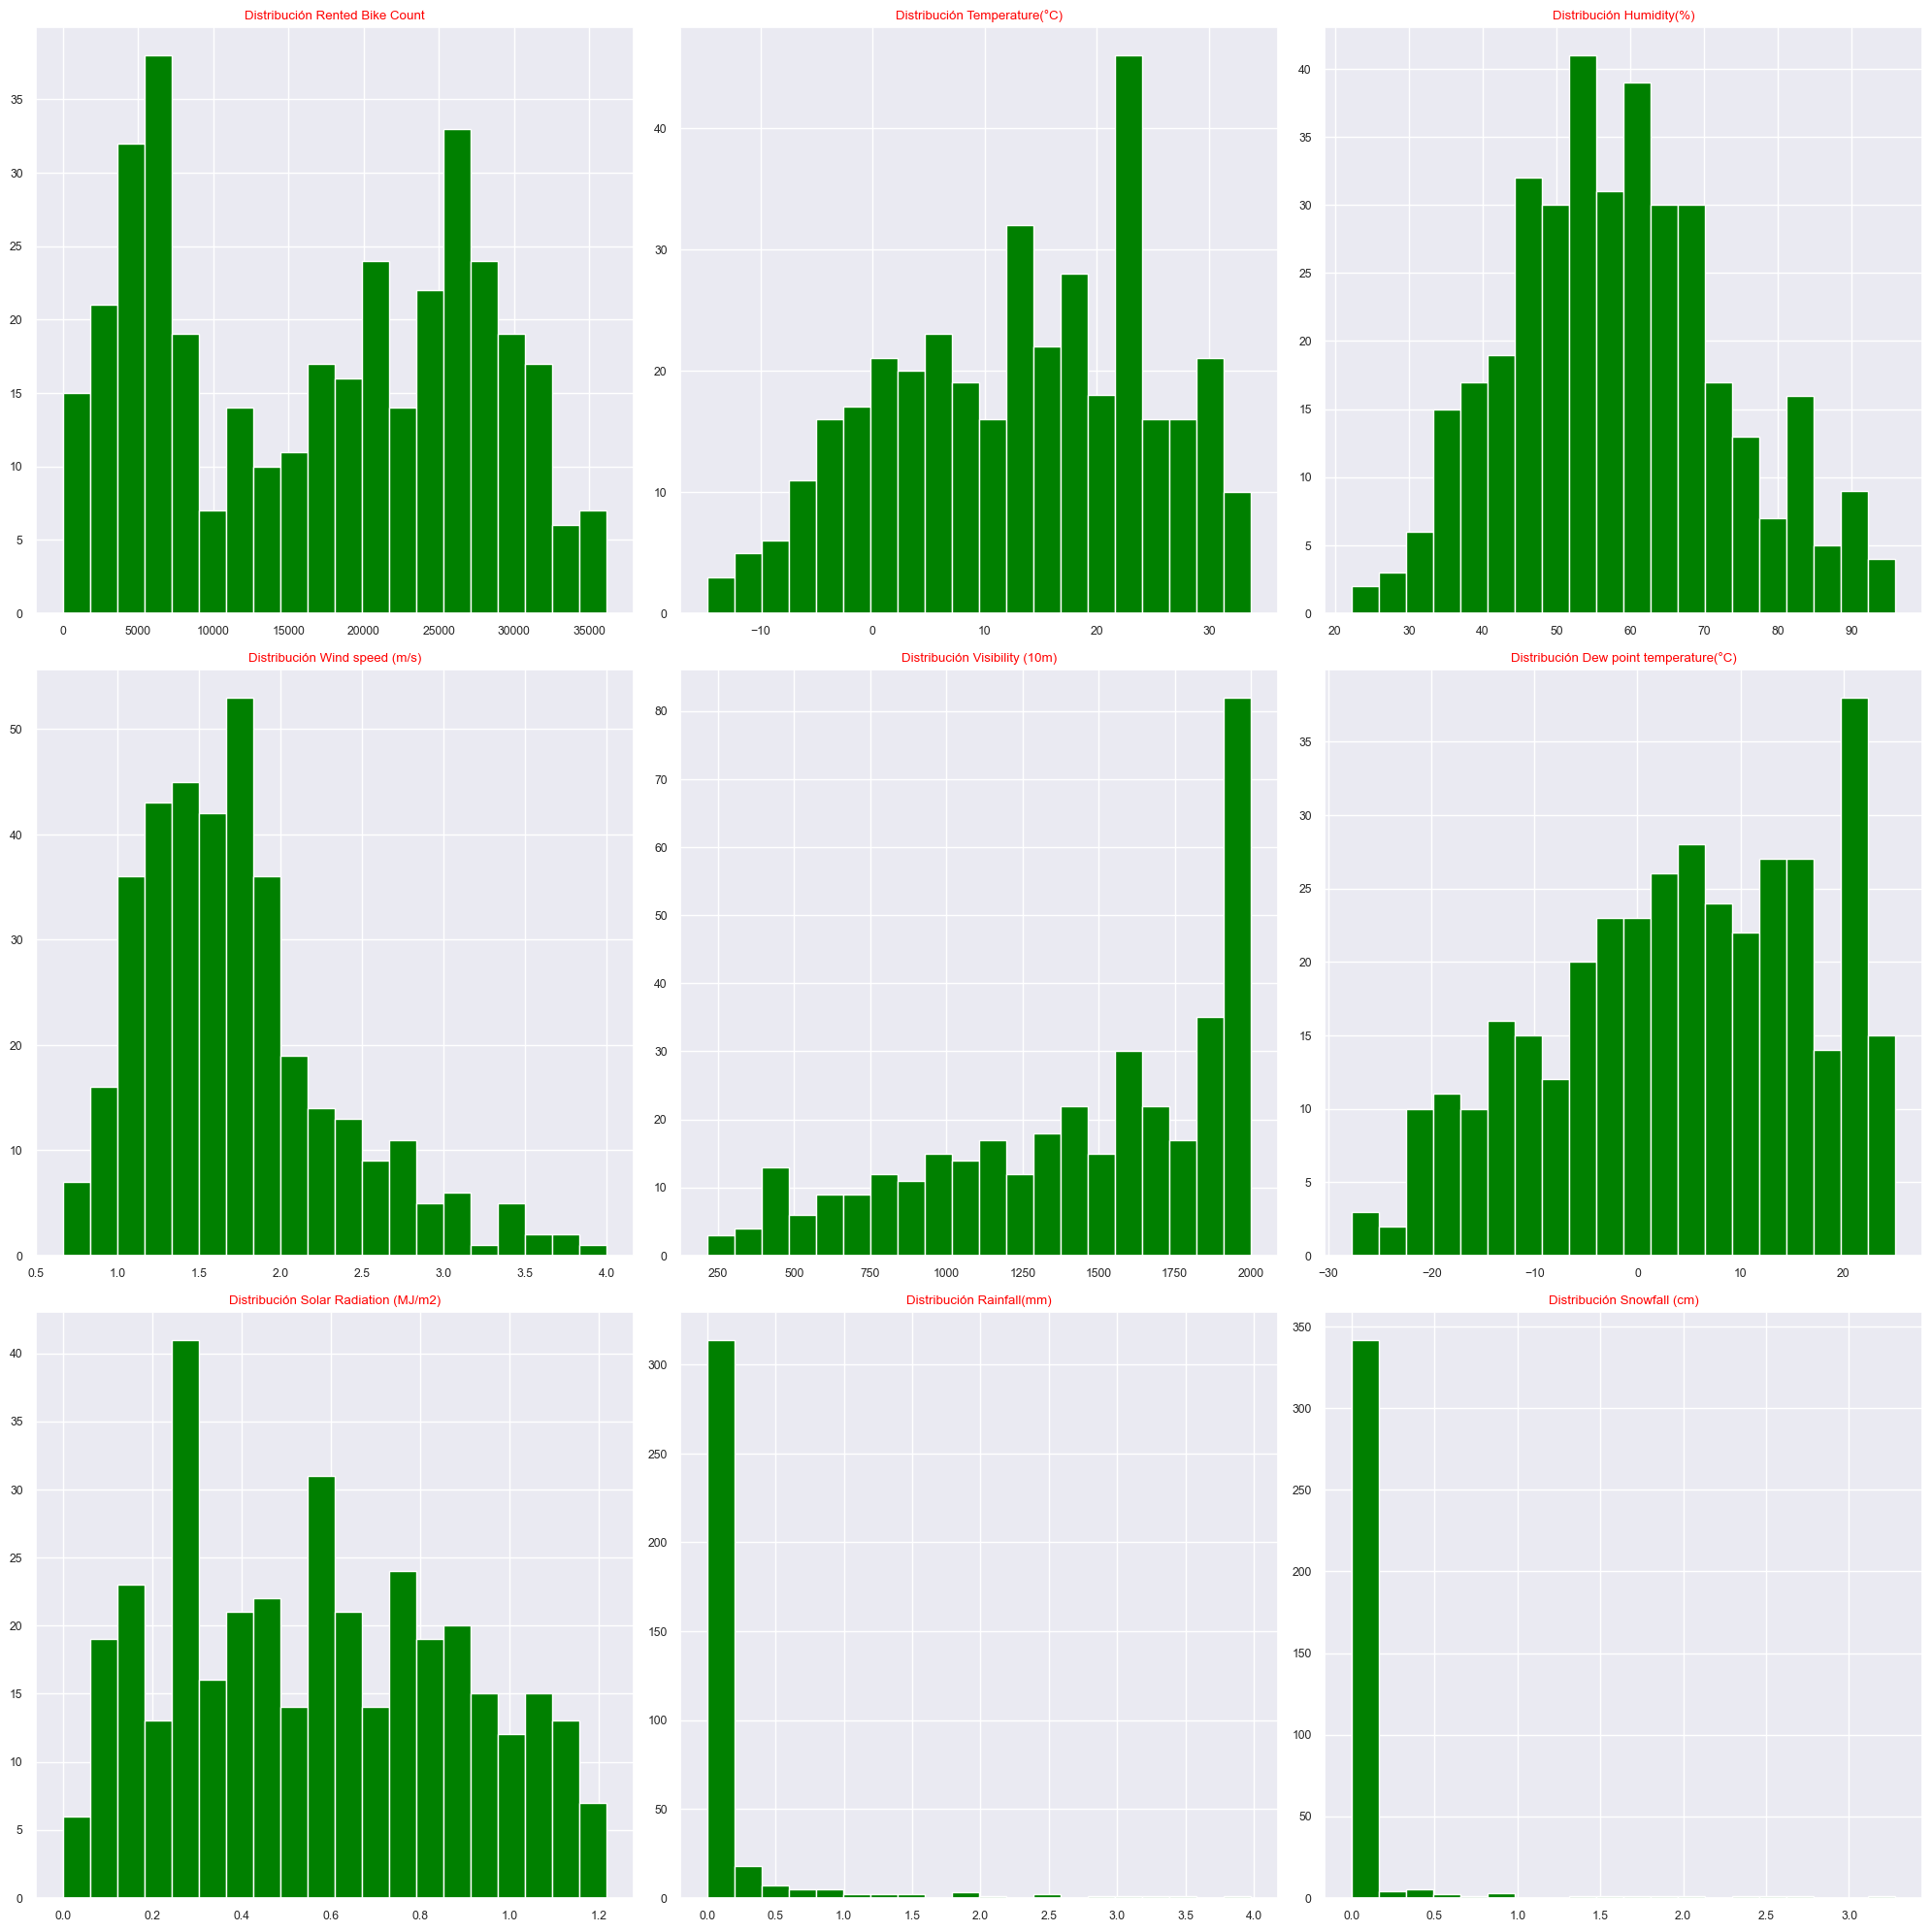

In [96]:
columnas =df_2.drop(['Date','Seasons','Holiday','Functioning Day'],axis=1).columns

def histograms_plot(dataframe, features, rows, cols):

    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title("Distribución "+feature,color='red')

    fig.tight_layout()  
    plt.show()

histograms_plot(df_2,df_2.loc[:,columnas],3,3)

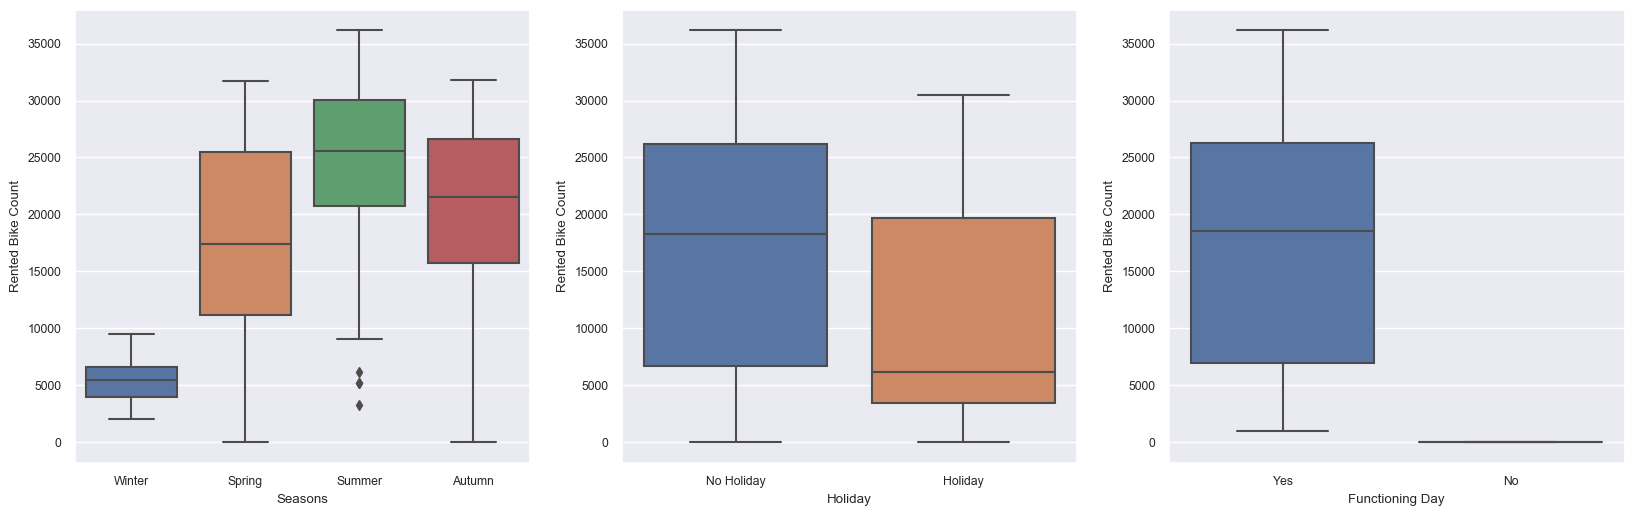

In [97]:
#Box plot de cada variable independiente v/s la variable dependiente
columns=['Seasons','Holiday','Functioning Day']

fig=plt.figure(figsize=(20,20))
for i,cols in enumerate(columns): 
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(x=cols,y='Rented Bike Count', data=df_2,ax=ax)

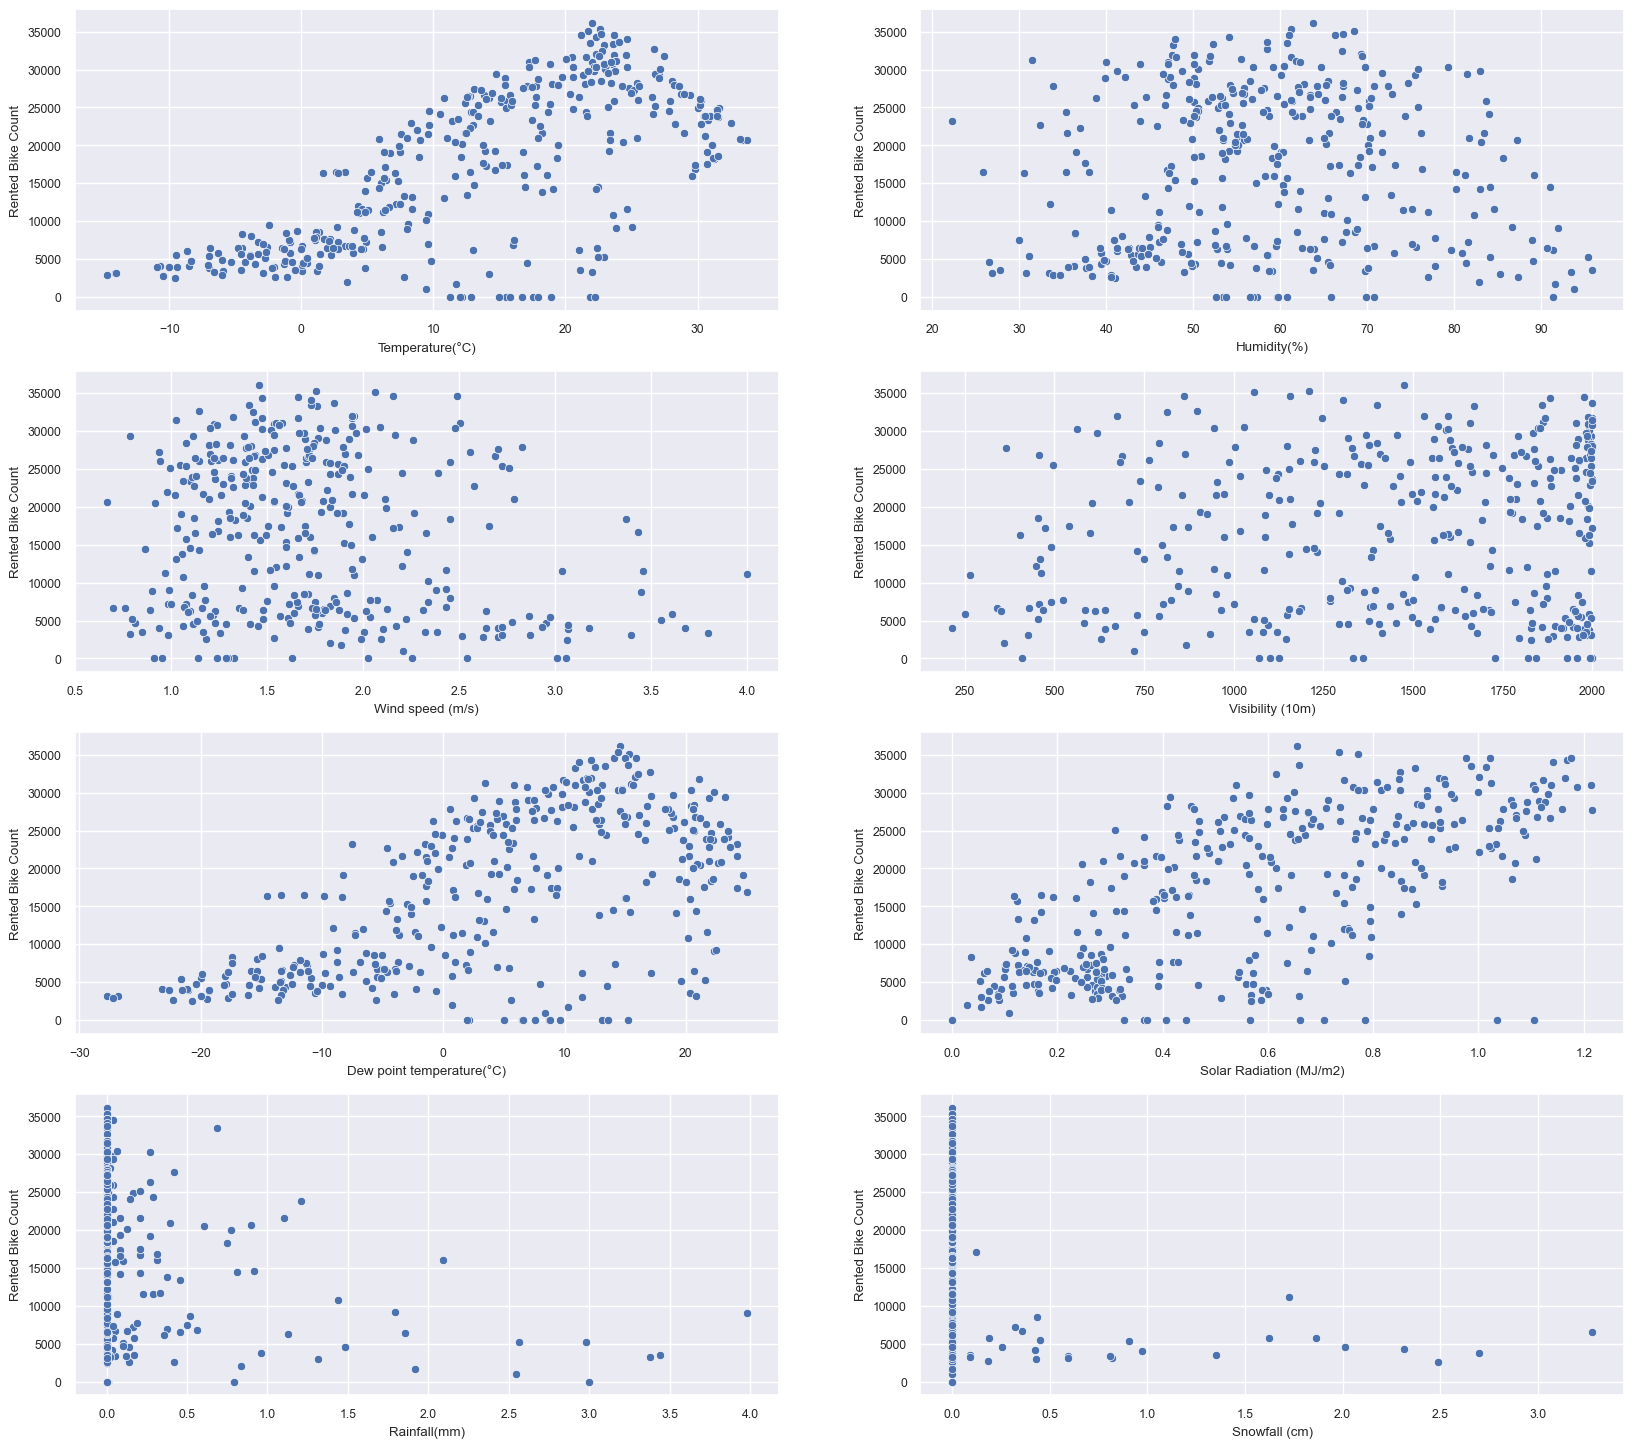

In [109]:
y_col = "Rented Bike Count"
x_columns = df_2.drop(['Date','Seasons','Holiday','Functioning Day','Rented Bike Count'],axis=1).columns

count=1
plt.subplots(figsize=(20, 18))
for x_col in x_columns:
    plt.subplot(4,2,count)
    sns.scatterplot(x=df_2[x_col],y=df_2["Rented Bike Count"])
    count+=1

plt.show()

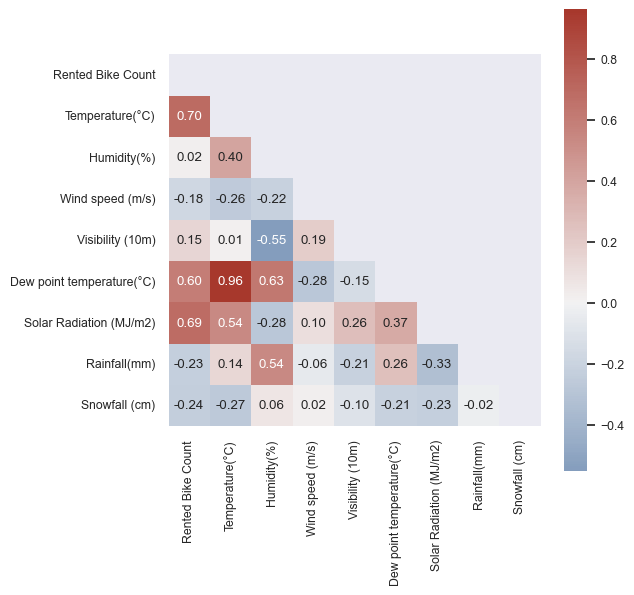

In [110]:
#matriz de correlacion de las variables independientes
corrMatrix = df_2.loc[:,columnas].corr()
#corrMatrix = X_cancer.iloc[:,0:11].corr()

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.rcParams['figure.figsize'] = (6,6)

sns.heatmap(corrMatrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

sns.set(font_scale=0.8)

plt.show()

### Lasso Regression

In [127]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [145]:
df_3=df_2.drop(['Rented Bike Count','Date'],axis=1)

categorical_cols = ['Seasons', 'Holiday', 'Functioning Day']

X=pd.get_dummies(df_3, columns=categorical_cols)

y = df_2['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 37, shuffle=True)

In [146]:
cols=df_3.drop(['Seasons','Holiday','Functioning Day'],axis=1).columns

In [166]:
scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train.iloc[:,:-8]),columns=[cols]).reset_index(drop=True)
X_test_sc = pd.DataFrame(scaler.transform(X_test.iloc[:,:-8]),columns=[cols]).reset_index(drop=True)

In [179]:
X_train_sc.columns = cols
X_test_sc.columns = cols
X_train_sc_2=pd.concat([X_train_sc, X_train.iloc[0:,-8:].reset_index(drop=True)], axis=1)
X_test_sc_2=pd.concat([X_test_sc, X_test.iloc[0:,-8:].reset_index(drop=True)], axis=1)

In [214]:
lasso = Lasso(alpha=1)
#
# Fit the Lasso model
#
lasso.fit(X_train_sc_2, y_train)
#
# Create the model score
#
print('R squared training set',round(lasso.score(X_train_sc_2, y_train),2))
print('R squared test set',round(lasso.score(X_test_sc_2, y_test),2)) 

R squared training set 0.84
R squared test set 0.8


C:\Users\herna\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+09, tolerance: 3.180e+06
  model = cd_fast.enet_coordinate_descent(


In [183]:
lasso.coef_

array([-5.49597275e+03, -3.35131616e+03, -5.87482228e+02, -2.13456931e+02,
        1.10756706e+04,  3.79479029e+03, -1.54410287e+03, -1.64895800e+02,
        6.20166269e+03, -0.00000000e+00,  1.73328038e+03, -2.71226397e+03,
       -3.19490873e+03,  4.16734631e-10, -2.19873365e+04,  0.00000000e+00])

In [184]:
# Training data
pred_train = lasso.predict(X_train_sc_2)
mse_train = mean_squared_error(y_train, pred_train,squared=False)
print('RMSE training set', round(mse_train, 2))

# Test data
pred = lasso.predict(X_test_sc_2)
mse_test =mean_squared_error(y_test, pred,squared=False)
print('RMSE test set', round(mse_test, 2))

RMSE training set 4162.25
RMSE test set 4185.63


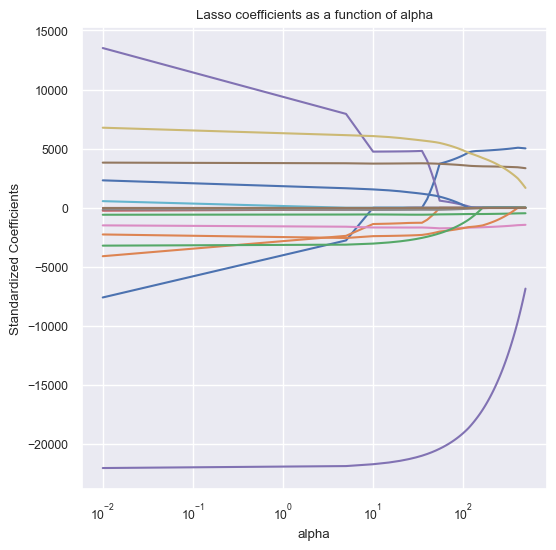

In [185]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_sc_2, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [186]:
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=37, max_iter=100000)

# Fit model
model.fit(X_train_sc_2, y_train)

LassoCV(cv=5, max_iter=100000, random_state=37)

In [187]:
model.alpha_

20.605179610124456

In [188]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_sc_2, y_train)

Lasso(alpha=20.605179610124456)

In [189]:
print(list(zip(lasso_best.coef_, X)))

[(0.0, 'Temperature(°C)'), (-1316.0122018615737, 'Humidity(%)'), (-582.9758233095067, 'Wind speed (m/s)'), (-34.44790101825444, 'Visibility (10m)'), (4763.474866643073, 'Dew point temperature(°C)'), (3745.4078856853803, 'Solar Radiation (MJ/m2)'), (-1675.252466272969, 'Rainfall(mm)'), (-183.26896808645154, 'Snowfall (cm)'), (5889.2896806289755, 'Seasons_Autumn'), (-0.22240101798480683, 'Seasons_Spring'), (1381.4286588349155, 'Seasons_Summer'), (-2366.517024900337, 'Seasons_Winter'), (-2836.2516486141176, 'Holiday_Holiday'), (2.2121450289967328e-10, 'Holiday_No Holiday'), (-21402.71214087535, 'Functioning Day_No'), (0.0, 'Functioning Day_Yes')]


In [190]:
print('R squared training set', round(lasso_best.score(X_train_sc_2, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_sc_2, y_test)*100, 2))

R squared training set 83.92
R squared test set 80.47


In [191]:
print('RMSE test set', mean_squared_error(y_test, lasso_best.predict(X_test_sc_2),squared = False))

RMSE test set 4161.419868809321


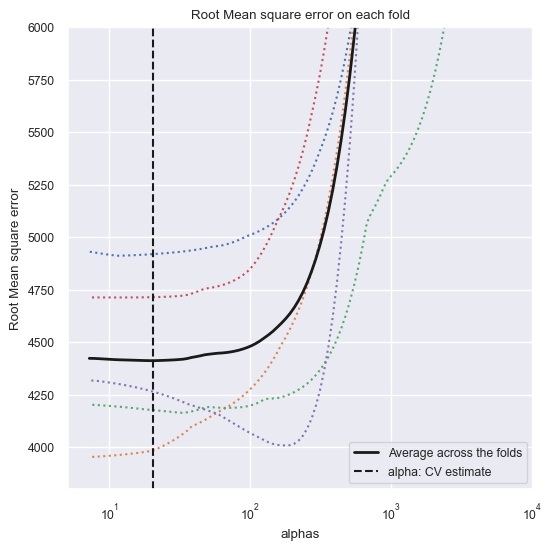

In [195]:
plt.semilogx(model.alphas_, np.sqrt(model.mse_path_), ":")
plt.plot(
    model.alphas_ ,
    np.sqrt(model.mse_path_).mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Root Mean square error")
plt.title("Root Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 3800, 6000
plt.ylim(ymin, ymax);

### Random Forest Regression

In [205]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RepeatedKFold
import multiprocessing

In [200]:
rf = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

rf.fit(X_train, y_train)

C:\Users\herna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=10,
                      n_jobs=-1, random_state=123)

In [201]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = rf.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2847.5903689240818


In [202]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
2,0.920276,NaN,9.0,150.0
11,0.920270,20.0,9.0,150.0
1,0.918779,NaN,7.0,150.0
10,0.918573,20.0,7.0,150.0


In [206]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
8,10,9,150,-2993.827498,333.310425,-1235.256422,25.384115
11,20,9,150,-2997.407605,344.166097,-1129.806330,29.680508
2,None,9,150,-2997.440358,345.010308,-1129.770458,29.610601
1,None,7,150,-3038.684088,310.053454,-1150.450982,38.426777


In [207]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2820.5879890485894


In [209]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,Temperature(°C),0.337381
5,Solar Radiation (MJ/m2),0.243022
15,Functioning Day_Yes,0.080098
11,Seasons_Winter,0.069602
4,Dew point temperature(°C),0.067600
14,Functioning Day_No,0.061918
6,Rainfall(mm),0.042280
1,Humidity(%),0.025759
8,Seasons_Autumn,0.017813
3,Visibility (10m),0.017266


In [211]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,5811.347668,178.184183,Temperature(°C)
5,4485.219455,226.677483,Solar Radiation (MJ/m2)
15,2061.129546,146.286432,Functioning Day_Yes
14,1734.099304,143.827464,Functioning Day_No
11,1350.348181,84.834136,Seasons_Winter
6,1153.731224,58.025368,Rainfall(mm)
4,1005.720755,47.075607,Dew point temperature(°C)
8,746.546562,53.083905,Seasons_Autumn
1,424.168315,18.699108,Humidity(%)
2,388.451243,38.441951,Wind speed (m/s)


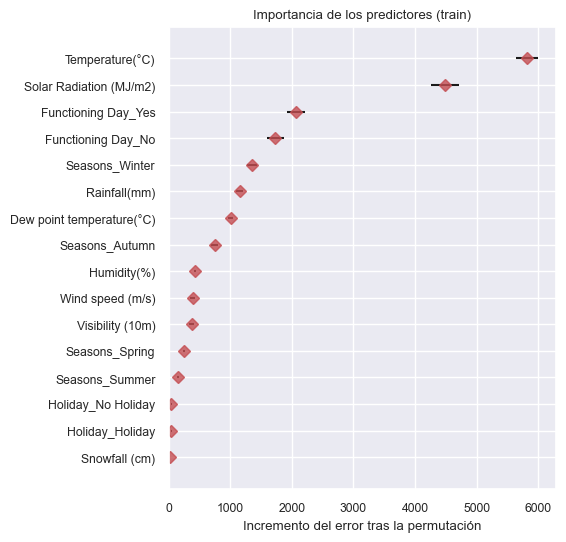

In [212]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');